In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Salary_dataset.csv")

In [3]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
data.head(2)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0


In [8]:
data.size

60

In [9]:
data.shape

(30, 2)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [14]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


<Axes: xlabel='Salary', ylabel='Count'>

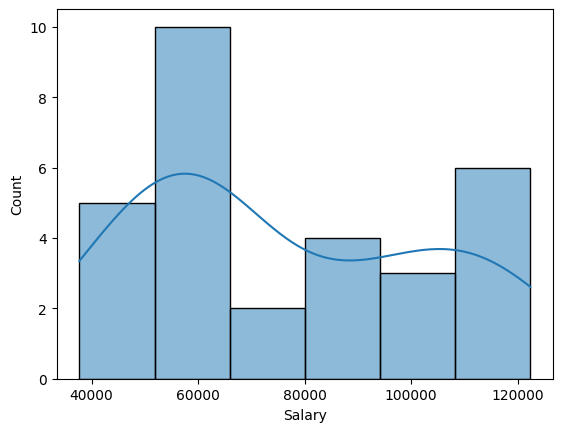

In [18]:
#visuals
#univariate
sns.histplot(data['Salary'],kde=True)

Most of the people salary lies between 50000 and 70000.

<Axes: ylabel='Salary'>

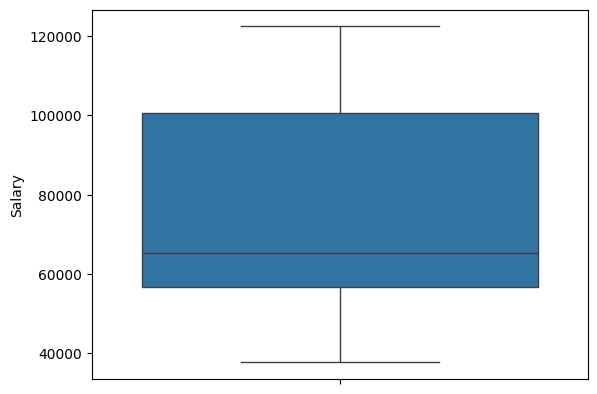

In [19]:
sns.boxplot(data['Salary'])

No outliers.
Medeian is approx 65000.

<Axes: ylabel='Salary'>

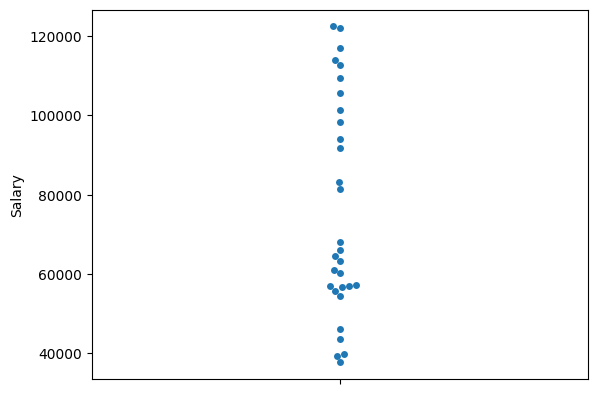

In [20]:
sns.swarmplot(data['Salary'])

<Figure size 2500x1500 with 0 Axes>

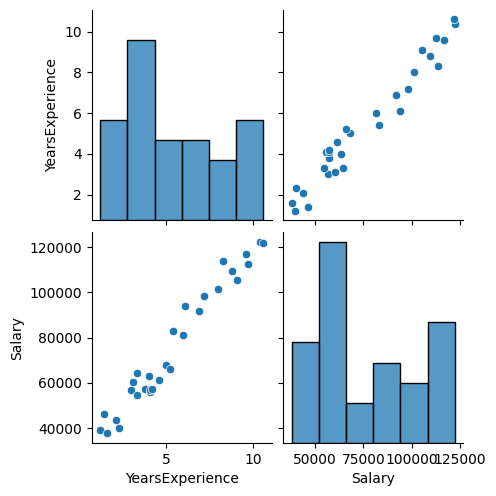

In [25]:
#bivariate
plt.figure(figsize=(25,15))
sns.pairplot(data)
plt.show()

 Salary has a positive correlation with experience.

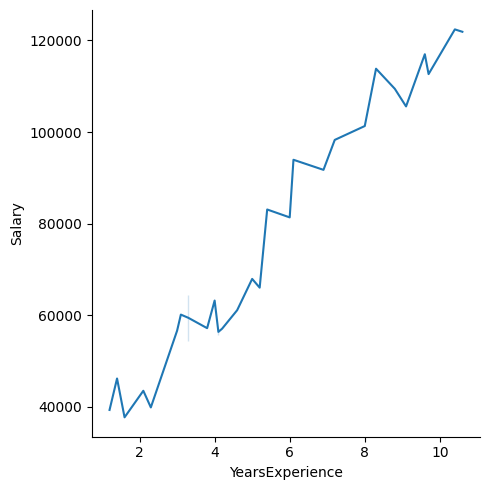

In [27]:
sns.relplot(x="YearsExperience",y="Salary",data=data,kind="line")

In [47]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [29]:
#MODELLING
#x = experience , y = salary

In [49]:
x = np.array(data["YearsExperience"]).reshape(-1,1)
y = np.array(data["Salary"]).reshape(-1,1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [52]:
y_train

array([[ 56958.],
       [ 39344.],
       [ 39892.],
       [ 66030.],
       [ 56643.],
       [ 57082.],
       [ 55795.],
       [101303.],
       [ 46206.],
       [ 37732.],
       [105583.],
       [ 43526.],
       [ 98274.],
       [116970.],
       [ 81364.],
       [121873.],
       [ 91739.],
       [ 54446.],
       [ 63219.],
       [ 61112.],
       [ 93941.],
       [ 60151.]])

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
reg = LinearRegression()

In [55]:
reg.fit(x_train,y_train)

LinearRegression()

In [56]:
reg.score(x_test,y_test)

0.9347210011126783

In [57]:
#result
y_pred = reg.predict(x_test)

In [58]:
y_pred

array([[115440.88180109],
       [ 71397.10622651],
       [102321.45928951],
       [ 75145.51265839],
       [ 55466.37889103],
       [ 60151.88693088],
       [122000.59305688],
       [107006.96732936]])

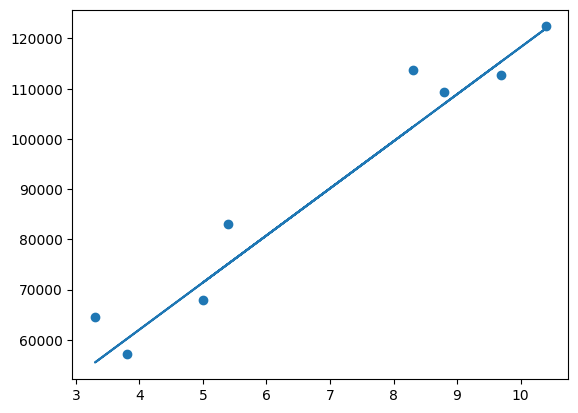

In [60]:
#visual
plt.plot(x_test,y_pred)
plt.scatter(x_test,y_test)
plt.show()

In [61]:
#checking error
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [62]:
mean_squared_error(y_true=y_test ,y_pred=y_pred)

38802588.99247057

In [63]:
mean_absolute_error(y_true=y_test ,y_pred=y_pred)

5056.995466663583